In [2]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [85]:
df = pd.read_csv('craigslist_motorcycle_data_full')

In [86]:
for idx, i in enumerate(df['price']):
    if i > 300000 or i < 100:
        df.drop(idx, axis=0, inplace = True)

In [87]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37926 entries, 0 to 58598
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      37926 non-null  int64  
 1   title           37925 non-null  object 
 2   year            17991 non-null  float64
 3   price           36880 non-null  float64
 4   neighborhood    33700 non-null  object 
 5   description     37925 non-null  object 
 6   url             37926 non-null  object 
 7   model           37926 non-null  object 
 8   vin             37926 non-null  int64  
 9   condition       37926 non-null  object 
 10  cryptocurrency  37926 non-null  int64  
 11  delivery        37926 non-null  int64  
 12  engine_size     17891 non-null  float64
 13  fuel_type       35763 non-null  object 
 14  mileage         27032 non-null  float64
 15  color           37691 non-null  object 
 16  street_legal    37926 non-null  int64  
 17  title_status    37871 non-null 

In [88]:
df = df.reset_index(drop=True)

In [89]:
for idx, i in enumerate(df['engine_size']):
    if i > 2500:
        df.drop(idx, axis=0, inplace = True)

In [90]:
df = df.reset_index(drop=True)

In [91]:
for idx, i in enumerate(df['mileage']):
    if i > 500000:
        df.drop(idx, axis=0, inplace = True)

In [92]:
df = df.reset_index(drop=True)

In [93]:
for idx, i in enumerate(df['condition'][:100]):
    df['condition'].replace({'new': '6'}, inplace=True)
    df['condition'].replace({'like new': '5'}, inplace=True)
    df['condition'].replace({'excellent': '4'}, inplace=True)
    df['condition'].replace({'good': '3'}, inplace=True)
    df['condition'].replace({'fair': '2'}, inplace=True)
    df['condition'].replace({'salvage': '1'}, inplace=True)

In [94]:
df['condition'] = pd.to_numeric(df['condition'])

In [95]:
df = df.reset_index(drop=True)

In [96]:
bike_type_dummies = pd.get_dummies(df['bike_type'])
df = pd.concat([df, bike_type_dummies], axis = 1)

In [97]:
df.drop(df.columns[0], axis=1, inplace=True)

In [98]:
df.drop(df.columns[3], axis=1, inplace=True)

In [99]:
df.drop(df.columns[3], axis=1, inplace=True)

In [100]:
df.drop(df.columns[3], axis=1, inplace=True)

In [101]:
df.drop(df.columns[3], axis=1, inplace=True)

In [102]:
df.drop(df.columns[3], axis=1, inplace=True)

In [103]:
df.drop(df.columns[4], axis=1, inplace=True)

In [104]:
df.drop(df.columns[6], axis=1, inplace=True)

In [105]:
df.drop(df.columns[7], axis=1, inplace=True)

In [106]:
df.drop(df.columns[7], axis=1, inplace=True)

In [107]:
df.drop(df.columns[7], axis=1, inplace=True)

In [108]:
df.drop(df.columns[7], axis=1, inplace=True)

In [109]:
df.drop(df.columns[7], axis=1, inplace=True)

In [110]:
df.dropna(inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7063 entries, 2 to 37915
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7063 non-null   object 
 1   year         7063 non-null   float64
 2   price        7063 non-null   float64
 3   condition    7063 non-null   int64  
 4   delivery     7063 non-null   int64  
 5   engine_size  7063 non-null   float64
 6   mileage      7063 non-null   float64
 7   bobbe        7063 non-null   uint8  
 8   cafe         7063 non-null   uint8  
 9   chopp        7063 non-null   uint8  
 10  cruis        7063 non-null   uint8  
 11  dirtb        7063 non-null   uint8  
 12  dual-        7063 non-null   uint8  
 13  moped        7063 non-null   uint8  
 14  other        7063 non-null   uint8  
 15  scoot        7063 non-null   uint8  
 16  sport        7063 non-null   uint8  
 17  stand        7063 non-null   uint8  
 18  stree        7063 non-null   uint8  
 19  touri

In [79]:
df = df.reset_index(drop=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7063 entries, 0 to 7062
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7063 non-null   float64
 1   price        7063 non-null   float64
 2   condition    7063 non-null   int64  
 3   delivery     7063 non-null   int64  
 4   engine_size  7063 non-null   float64
 5   mileage      7063 non-null   float64
 6   bobbe        7063 non-null   uint8  
 7   cafe         7063 non-null   uint8  
 8   chopp        7063 non-null   uint8  
 9   cruis        7063 non-null   uint8  
 10  dirtb        7063 non-null   uint8  
 11  dual-        7063 non-null   uint8  
 12  moped        7063 non-null   uint8  
 13  other        7063 non-null   uint8  
 14  scoot        7063 non-null   uint8  
 15  sport        7063 non-null   uint8  
 16  stand        7063 non-null   uint8  
 17  stree        7063 non-null   uint8  
 18  touri        7063 non-null   uint8  
 19  trike 

In [112]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7063 entries, 2 to 37915
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7063 non-null   object 
 1   year         7063 non-null   float64
 2   price        7063 non-null   float64
 3   condition    7063 non-null   int64  
 4   delivery     7063 non-null   int64  
 5   engine_size  7063 non-null   float64
 6   mileage      7063 non-null   float64
 7   bobbe        7063 non-null   uint8  
 8   cafe         7063 non-null   uint8  
 9   chopp        7063 non-null   uint8  
 10  cruis        7063 non-null   uint8  
 11  dirtb        7063 non-null   uint8  
 12  dual-        7063 non-null   uint8  
 13  moped        7063 non-null   uint8  
 14  other        7063 non-null   uint8  
 15  scoot        7063 non-null   uint8  
 16  sport        7063 non-null   uint8  
 17  stand        7063 non-null   uint8  
 18  stree        7063 non-null   uint8  
 19  touri

In [113]:
df = df.reset_index(drop=True)

In [114]:
df.drop_duplicates(inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7063 entries, 0 to 7062
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7063 non-null   object 
 1   year         7063 non-null   float64
 2   price        7063 non-null   float64
 3   condition    7063 non-null   int64  
 4   delivery     7063 non-null   int64  
 5   engine_size  7063 non-null   float64
 6   mileage      7063 non-null   float64
 7   bobbe        7063 non-null   uint8  
 8   cafe         7063 non-null   uint8  
 9   chopp        7063 non-null   uint8  
 10  cruis        7063 non-null   uint8  
 11  dirtb        7063 non-null   uint8  
 12  dual-        7063 non-null   uint8  
 13  moped        7063 non-null   uint8  
 14  other        7063 non-null   uint8  
 15  scoot        7063 non-null   uint8  
 16  sport        7063 non-null   uint8  
 17  stand        7063 non-null   uint8  
 18  stree        7063 non-null   uint8  
 19  touri 

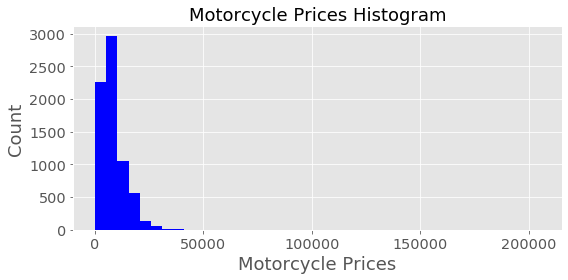

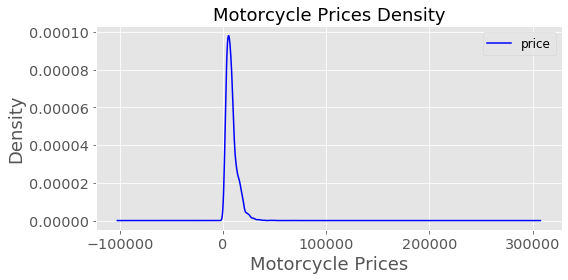

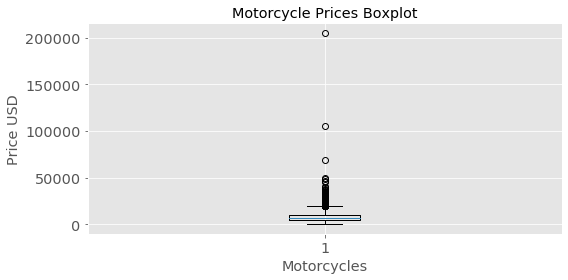

In [116]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'years plotted by row')

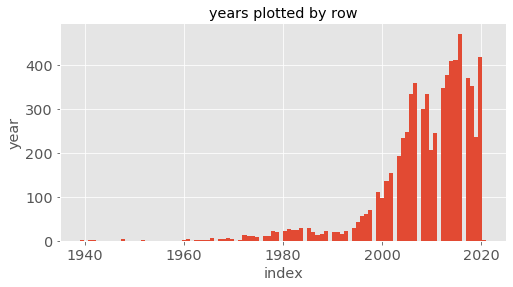

In [117]:
plt.hist(df['year'], 100)
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7063 entries, 0 to 7062
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7063 non-null   object 
 1   year         7063 non-null   float64
 2   price        7063 non-null   float64
 3   condition    7063 non-null   int64  
 4   delivery     7063 non-null   int64  
 5   engine_size  7063 non-null   float64
 6   mileage      7063 non-null   float64
 7   bobbe        7063 non-null   uint8  
 8   cafe         7063 non-null   uint8  
 9   chopp        7063 non-null   uint8  
 10  cruis        7063 non-null   uint8  
 11  dirtb        7063 non-null   uint8  
 12  dual-        7063 non-null   uint8  
 13  moped        7063 non-null   uint8  
 14  other        7063 non-null   uint8  
 15  scoot        7063 non-null   uint8  
 16  sport        7063 non-null   uint8  
 17  stand        7063 non-null   uint8  
 18  stree        7063 non-null   uint8  
 19  touri 

In [134]:
X1 = df.drop(['price', 'title'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [136]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.7083383913040522
Out of Bag Score :  	 0.7110431286638438
Mean Squared Error :  8240499.894517569


In [137]:
np.sqrt(mean_squared_error(y1_test, y_pred))

2870.6270908144043

In [138]:
for idx,_ in enumerate(y1_test - y_pred):
    print(y1_test[idx], '\t\t',':',_)

25500.0 		 : 7847.169999999998
8000.0 		 : -1586.3700000000008
3700.0 		 : -535.9650000000001
13880.0 		 : 5424.6
4600.0 		 : -1242.625
1900.0 		 : -1346.4499999999998
3600.0 		 : 526.0250000000001
19900.0 		 : -1315.7649999999994
4200.0 		 : 367.5999999999999
3300.0 		 : -691.6599999999999
18995.0 		 : 3912.4400000000005
3100.0 		 : -531.2750000000001
7995.0 		 : 1960.7200000000003
7500.0 		 : 222.59166666666624
10000.0 		 : 692.7849999999999
3995.0 		 : -1851.87
6400.0 		 : -278.4899999999998
10000.0 		 : 1691.5750000000007
9000.0 		 : 3361.95
2500.0 		 : -666.44
3500.0 		 : -8182.700000000001
4500.0 		 : -4079.5
8600.0 		 : 480.22500000000036
12500.0 		 : 3999.1949999999997
5000.0 		 : 494.08500000000004
8500.0 		 : -1497.0499999999993
4600.0 		 : 917.125
16800.0 		 : 151.0
4250.0 		 : -305.5799999999999
3500.0 		 : -1209.3050000000003
6200.0 		 : 325.97500000000036
5500.0 		 : 376.5799999999999
2700.0 		 : -4124.32
5300.0 		 : 25.524999999999636
4300.0 		 : -458.97500000000036
1377

4200.0 		 : 1231.9499999999998
5000.0 		 : -3742.115
5000.0 		 : -2130.2700000000004
3500.0 		 : -2258.87
6898.0 		 : -607.8100000000004
4500.0 		 : -441.39500000000044
9200.0 		 : 3920.45
6900.0 		 : -250.92500000000018
10995.0 		 : 1741.6049999999996
4500.0 		 : -249.27499999999964
10000.0 		 : 176.98999999999978
10500.0 		 : -1390.375
5995.0 		 : -2262.26
5500.0 		 : -15.055000000000291
2500.0 		 : 105.6550000000002
12500.0 		 : 1826.7999999999993
3999.0 		 : -3489.5649999999996
14500.0 		 : -396.7900000000009
5400.0 		 : -1765.8900000000003
4250.0 		 : 2237.51
15999.0 		 : 5101.594999999999
6200.0 		 : -1261.0
500.0 		 : -4655.26
8000.0 		 : 2589.925
12499.0 		 : 1916.6200000000008
18900.0 		 : 5107.219999999999
8995.0 		 : 140.26499999999942
3250.0 		 : -1334.1899999999996
5999.0 		 : -4495.094999999999
3950.0 		 : -1346.5649999999996
8500.0 		 : 547.2749999999996
5777.0 		 : -2778.785
8000.0 		 : -1099.5699999999997
10999.0 		 : 2949.8950000000004
25500.0 		 : -2995.3250000000007

9500.0 		 : -5518.865
3800.0 		 : -1153.3400000000001
6995.0 		 : -819.6450000000004
6700.0 		 : -4999.41
22000.0 		 : 685.0
3000.0 		 : -1222.9899999999998
850.0 		 : -2817.07
10000.0 		 : 2054.6800000000003
7900.0 		 : -2057.7649999999994
9500.0 		 : -141.45000000000073
5500.0 		 : 542.4099999999999
4550.0 		 : -880.7950000000001
13995.0 		 : 4968.209999999999
17995.0 		 : 6579.575000000001
5800.0 		 : 2078.24
29500.0 		 : 12116.165
10995.0 		 : 2809.0
3000.0 		 : -3297.2799999999997
6000.0 		 : -520.3450000000003
11500.0 		 : -9261.25
6500.0 		 : -1473.1099999999997
8695.0 		 : -48.95999999999913
14998.0 		 : -10542.724999999999
6500.0 		 : -1414.0100000000002
4200.0 		 : -716.5200000000004
14195.0 		 : -408.34000000000015
7200.0 		 : 144.54500000000007
6500.0 		 : -1413.8500000000004
6495.0 		 : -43.93000000000029
8500.0 		 : 1074.5600000000004
4200.0 		 : -456.3199999999997
2900.0 		 : -1194.1950000000002
16995.0 		 : -429.46500000000015
9500.0 		 : -2290.6550000000007
2500.0 		 :

5000.0 		 : -119.20499999999993
2900.0 		 : -1596.6549999999997
14995.0 		 : 653.5900000000001
12500.0 		 : -3334.5300000000007
8500.0 		 : 1347.0299999999997
8000.0 		 : 1483.8950000000004
12900.0 		 : 2201.584999999999
9499.0 		 : -8274.235
9500.0 		 : 1916.5749999999998
11500.0 		 : 26.725000000000364
5000.0 		 : -262.60000000000036
18999.0 		 : 658.0
9885.0 		 : -2080.0499999999993
3200.0 		 : -220.6500000000001
6800.0 		 : -6927.045
2400.0 		 : -919.7950000000001
10500.0 		 : 1025.3799999999992
7800.0 		 : 1413.2650000000003
1100.0 		 : -3477.585
6250.0 		 : -95.77499999999964
3900.0 		 : -1265.6949999999997
5900.0 		 : -269.8599999999997
12000.0 		 : -4689.095000000001
3000.0 		 : 38.190000000000055
3800.0 		 : 138.61499999999978
7998.0 		 : -146.66499999999996
6995.0 		 : 900.8149999999996
4899.0 		 : -82.52499999999964
10495.0 		 : -544.1650000000009
2200.0 		 : -794.6750000000002
2100.0 		 : -1101.8200000000002
10200.0 		 : -324.8099999999995
9495.0 		 : -191.26000000000022
13

3400.0 		 : -1169.9350000000004
16995.0 		 : -193.75
6900.0 		 : 411.85499999999956
6299.0 		 : 1293.7349999999997
2750.0 		 : 203.20499999999993
3800.0 		 : -1278.915
5950.0 		 : -1508.12
17495.0 		 : 228.3100000000013
8900.0 		 : 2144.4350000000004
15400.0 		 : 1305.2299999999996
18999.0 		 : 4708.285
6600.0 		 : -1650.9750000000004
4900.0 		 : 6.274999999999636
9500.0 		 : 3354.615
7499.0 		 : -6871.639999999999
9495.0 		 : -81.67499999999927
1900.0 		 : -1013.585
3800.0 		 : -1326.9650000000001
15000.0 		 : -5084.759999999998
8750.0 		 : -3228.115
6999.0 		 : 149.07999999999993
6895.0 		 : -404.0150000000003
13500.0 		 : -123.26499999999942
5750.0 		 : -1342.415
8000.0 		 : -465.03499999999985
5995.0 		 : -2228.465
6500.0 		 : -983.9799999999996
3500.0 		 : 687.5450000000001
3250.0 		 : 496.9000000000001
7000.0 		 : -1584.0849999999991
10500.0 		 : 2615.8450000000003
2700.0 		 : -372.6350000000002
6999.0 		 : -5807.174999999999
7000.0 		 : -1464.6900000000005
2995.0 		 : -152.82000

10000.0 		 : -801.7299999999996
3000.0 		 : -1497.0550000000003
7250.0 		 : -3054.5300000000007
20000.0 		 : 1262.9150000000009
1500.0 		 : -1657.475
12900.0 		 : 3619.584999999999
4750.0 		 : 447.4250000000002
7995.0 		 : -206.90999999999985
10999.0 		 : 1785.2900000000009
6995.0 		 : 214.84500000000025
19000.0 		 : 1530.7599999999984
4500.0 		 : 941.3499999999999
5000.0 		 : 429.6199999999999
2200.0 		 : -554.3400000000001
10990.0 		 : 1834.9150000000009
12600.0 		 : 4281.049999999999
7500.0 		 : -461.6800000000003
10500.0 		 : 3068.3
3600.0 		 : -468.16499999999996
5000.0 		 : -6178.139999999999
5900.0 		 : -1178.3199999999997
5495.0 		 : 328.66499999999996
3500.0 		 : -2012.4049999999997
6800.0 		 : -2310.709999999999
1500.0 		 : -1529.4292883333337
3300.0 		 : -1316.5200000000004
9500.0 		 : -8425.89
8250.0 		 : -5089.225
15999.0 		 : -1721.9399999999987
22999.0 		 : 6063.494999999999
10500.0 		 : 3039.325
3895.0 		 : -1704.2399999999998
5900.0 		 : -171.20499999999993
10800.0 		 

No handles with labels found to put in legend.


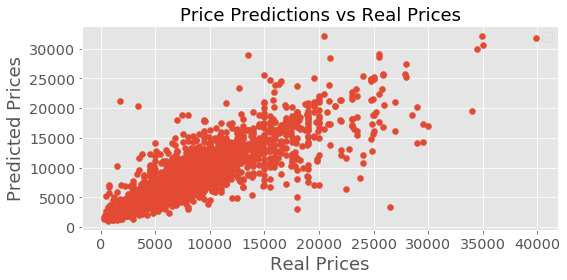

In [139]:
plt.scatter(y1_test, y_pred)
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

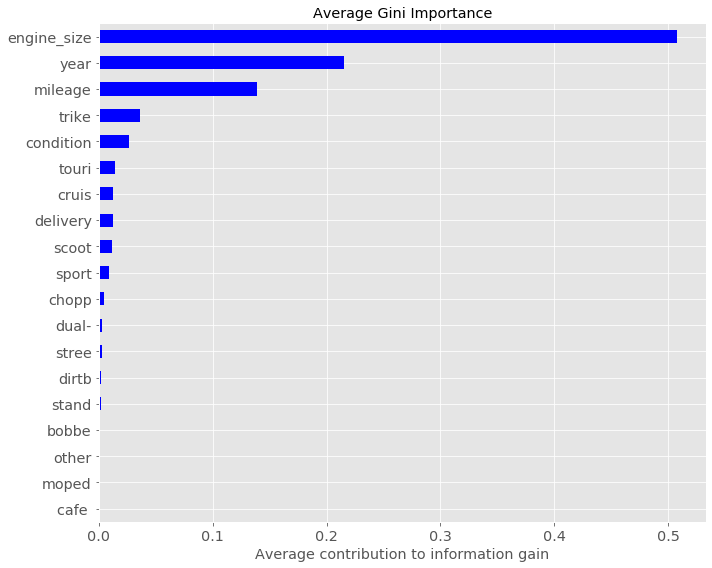

In [140]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [141]:
for idx, i in enumerate(df['price']):
    if i > 40000:
        df.drop(idx, axis=0, inplace = True)

In [142]:
df = df.reset_index(drop=True)

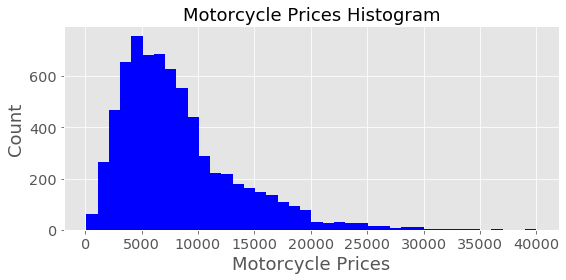

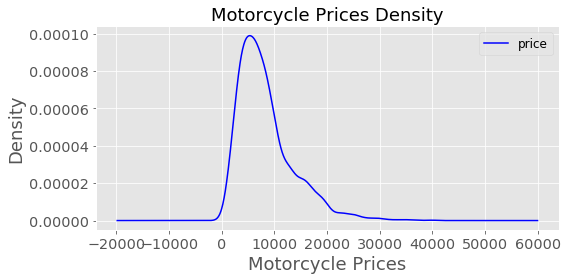

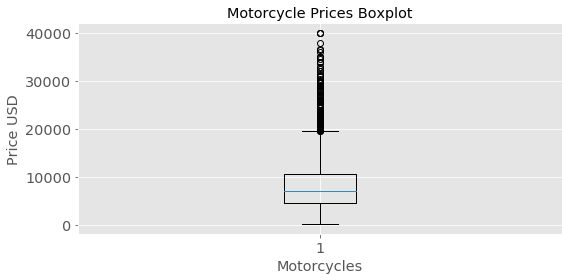

In [143]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [191]:
df.drop([727, 6301], inplace=True)

In [217]:
X1 = df.drop(['price', 'title', 'delivery', 'cafe ', 'dirtb', 'moped', 'other', 'scoot', 'stand', 'stree'], axis=1)
y1 = df['price']

In [218]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [219]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.6897400817604797
Out of Bag Score :  	 0.7101567142280665
Mean Squared Error :  8759400.56737998


In [195]:
np.sqrt(mean_squared_error(y1_test, y_pred))

3134.880792289907

In [173]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


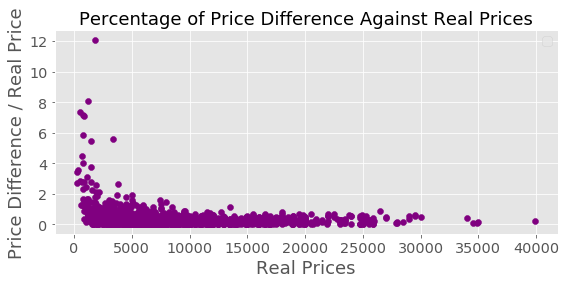

In [174]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


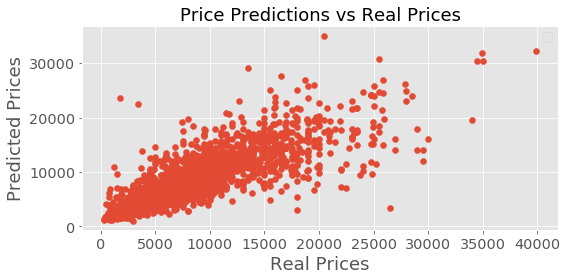

In [175]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

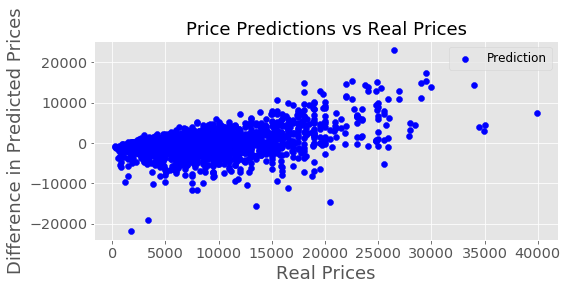

In [176]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

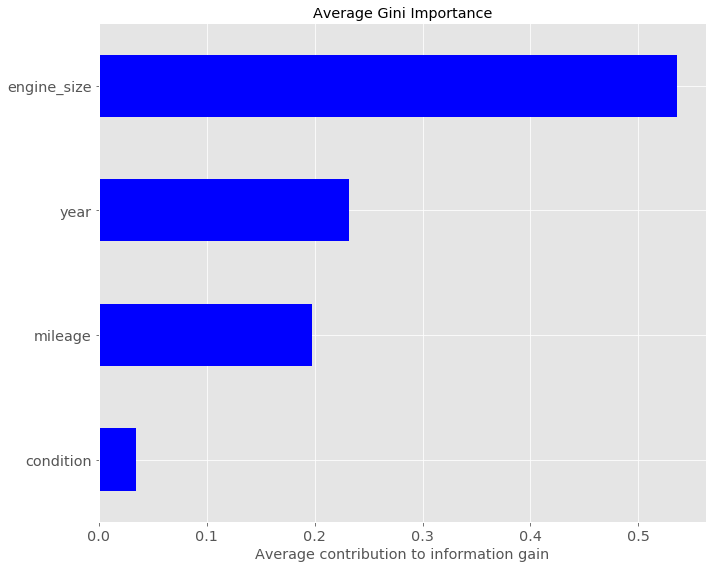

In [178]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'delivery', 'bobbe', 'cafe ', 'chopp', 'cruis', 'dirtb', 'dual-', 'moped', 'other', 'scoot', 'sport', 'stand', 'stree', 'touri', 'trike'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [155]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [156]:
pos_or_neg

['over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 

In [157]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [158]:
analysis_df['diff'] = diff

In [159]:
analysis_df['diff_percent'] = diff_percent

In [160]:
analysis_df['pos_or_neg'] = pos_or_neg

In [161]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 2657 to 1620
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2329 non-null   object 
 1   year          2329 non-null   float64
 2   price         2329 non-null   float64
 3   condition     2329 non-null   int64  
 4   delivery      2329 non-null   int64  
 5   engine_size   2329 non-null   float64
 6   mileage       2329 non-null   float64
 7   bobbe         2329 non-null   uint8  
 8   cafe          2329 non-null   uint8  
 9   chopp         2329 non-null   uint8  
 10  cruis         2329 non-null   uint8  
 11  dirtb         2329 non-null   uint8  
 12  dual-         2329 non-null   uint8  
 13  moped         2329 non-null   uint8  
 14  other         2329 non-null   uint8  
 15  scoot         2329 non-null   uint8  
 16  sport         2329 non-null   uint8  
 17  stand         2329 non-null   uint8  
 18  stree         2329 non-nu

In [162]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [163]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 2657 to 1620
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2329 non-null   object 
 1   pos_or_neg    2329 non-null   object 
 2   diff          2329 non-null   float64
 3   diff_percent  2329 non-null   float64
 4   price         2329 non-null   float64
 5   year          2329 non-null   float64
 6   mileage       2329 non-null   float64
 7   engine_size   2329 non-null   float64
 8   condition     2329 non-null   int64  
 9   delivery      2329 non-null   int64  
 10  bobbe         2329 non-null   uint8  
 11  cafe          2329 non-null   uint8  
 12  chopp         2329 non-null   uint8  
 13  cruis         2329 non-null   uint8  
 14  dirtb         2329 non-null   uint8  
 15  dual-         2329 non-null   uint8  
 16  moped         2329 non-null   uint8  
 17  other         2329 non-null   uint8  
 18  scoot         2329 non-nu

In [164]:
adf_idx = analysis_df['diff'].sort_values().index

In [165]:
df.engine_size[1879]

1200.0

In [166]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,delivery,...,dirtb,dual-,moped,other,scoot,sport,stand,stree,touri,trike
2877,2012 harley streetglide,over +,8572.540,0.463381,18500.0,2012.0,500.0,2200.0,5,0,...,0,0,0,0,0,0,0,0,0,0
6596,2016 Harley Davidson Road Glide CVO,over +,8612.115,0.296969,29000.0,2016.0,2338.0,110.0,5,0,...,0,0,0,0,0,0,0,0,1,0
4901,2018 Harley Davidson Softail Heritage Classic,short -,8751.480,0.530393,16500.0,2018.0,1580.0,114.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1431,1973 Triumph Hurricane,over +,8756.630,0.564944,15500.0,1973.0,2250.0,750.0,4,0,...,0,0,0,0,0,0,0,0,0,0
3628,2016 Harley Davidson CVO Streetglide,over +,8986.030,0.359441,25000.0,2016.0,15500.0,1800.0,5,0,...,0,0,0,0,0,0,0,0,0,0
751,Harley Davidson 2014 VROD Night Special VRSCDX.,over +,8991.050,0.473238,18999.0,2014.0,1011.0,1250.0,5,0,...,0,0,0,0,0,0,0,1,0,0
4458,Harley Davidson Road Glide - 2012,over +,8993.830,0.408810,22000.0,2012.0,6768.0,1690.0,5,0,...,0,0,0,0,0,0,0,0,1,0
3350,2017 Triumph Bonneville Bobber,short -,9016.075,0.949160,9499.0,2017.0,898.0,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
2682,2011 Can-Am Spyder RT SE5 Limited Great Mother...,over +,9055.130,0.653800,13850.0,2011.0,18324.0,900.0,4,0,...,0,0,0,0,0,0,0,0,1,0
6595,2018 Roadglide Special Stage 3. Frt & Rear Le...,over +,9323.410,0.327137,28500.0,2018.0,5005.0,1868.0,5,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df = df[df.engine_size != 895.5236939583598]

In [55]:
len(df)

8042

In [56]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [58]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.6778802873263221
Out of Bag Score :  	 0.7032626543684917
Mean Squared Error Score :  3007.8239663795284


In [59]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


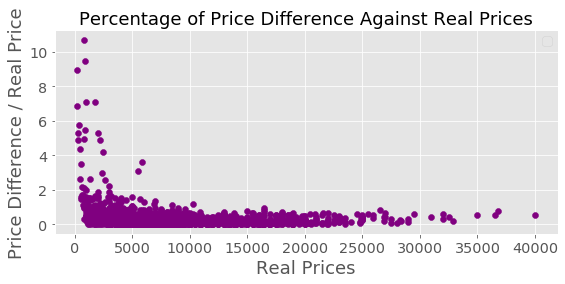

In [60]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


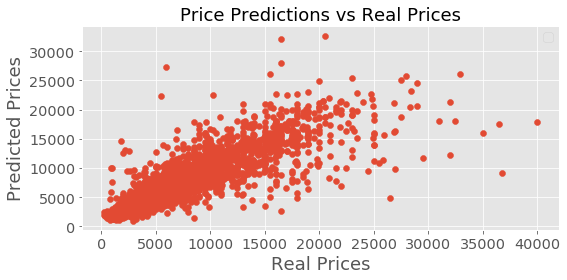

In [61]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

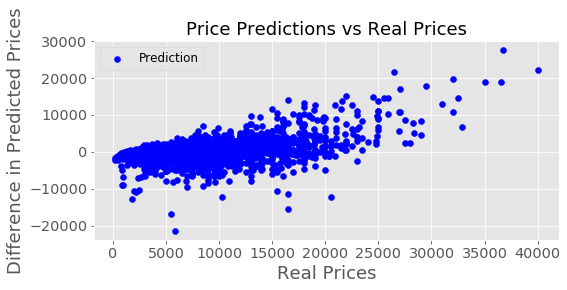

In [62]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

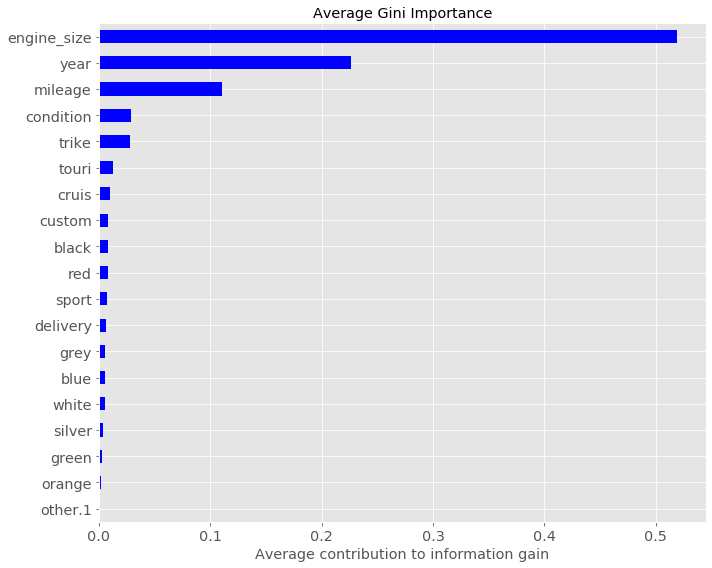

In [63]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [64]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [65]:
pos_or_neg

['short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 '

In [66]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [67]:
analysis_df['diff'] = diff

In [68]:
analysis_df['diff_percent'] = diff_percent

In [69]:
analysis_df['pos_or_neg'] = pos_or_neg

In [70]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   year            2654 non-null   float64
 2   price           2654 non-null   float64
 3   neighborhood    2496 non-null   object 
 4   description     2654 non-null   object 
 5   url             2654 non-null   object 
 6   model           2654 non-null   object 
 7   vin             2654 non-null   int64  
 8   condition       2654 non-null   int64  
 9   cryptocurrency  2654 non-null   int64  
 10  delivery        2654 non-null   int64  
 11  engine_size     2654 non-null   float64
 12  fuel_type       2654 non-null   object 
 13  mileage         2654 non-null   float64
 14  color           2654 non-null   object 
 15  street_legal    2654 non-null   int64  
 16  title_status    2654 non-null   object 
 17  transmission    2654 non-null

In [71]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [72]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   pos_or_neg      2654 non-null   object 
 2   diff            2654 non-null   float64
 3   diff_percent    2654 non-null   float64
 4   price           2654 non-null   float64
 5   year            2654 non-null   float64
 6   mileage         2654 non-null   float64
 7   engine_size     2654 non-null   float64
 8   condition       2654 non-null   int64  
 9   neighborhood    2496 non-null   object 
 10  description     2654 non-null   object 
 11  url             2654 non-null   object 
 12  model           2654 non-null   object 
 13  vin             2654 non-null   int64  
 14  cryptocurrency  2654 non-null   int64  
 15  delivery        2654 non-null   int64  
 16  fuel_type       2654 non-null   object 
 17  color           2654 non-null

In [73]:
adf_idx = analysis_df['diff'].sort_values().index

In [74]:
len(analysis_df)

2654

In [75]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
9688,2013 Victory XC,over +,9740.675000,0.391192,24900.0,2013.0,18000.000000,1890.0,4,Fargo,...,0,0,0,1,0,0,0,1,0,0
9715,2007 Big Dog k9 chopper,over +,9958.605000,0.569063,17500.0,2007.0,4976.000000,1916.0,3,Howard Lake,...,0,0,0,0,0,0,0,1,0,0
492,2015 Harley Tri Glide,over +,9964.090000,0.433221,23000.0,2015.0,4477.000000,1688.0,5,Goodyear,...,0,0,0,0,0,0,0,1,0,0
10571,2009 Harley Davidson Screaming Eagle Softtail ...,over +,10062.905000,0.543941,18500.0,2009.0,7000.000000,1800.0,4,Troy,...,0,0,0,0,1,0,0,1,0,0
10429,2016 Harley Davidson FLTRUSE CVO Road Glide Ultra,over +,10202.485000,0.393918,25900.0,2016.0,7600.000000,1800.0,5,"St. Joseph, MO",...,0,0,0,0,0,0,0,1,0,0
15937,2004 Harley Davidson Ultra Classic Trike,over +,10267.005000,0.570389,18000.0,2004.0,15550.000000,1340.0,5,NaN,...,0,0,0,0,0,0,0,1,0,0
14349,1979 Harley-Davidson FXE Fatbob “Wet Lilly” Cu...,over +,10336.165000,0.608189,16995.0,1979.0,0.000000,1340.0,5,Zieglerville,...,0,0,0,0,0,0,0,1,0,0
2286,2006 Ducati Sport Classic,over +,10367.300000,0.671023,15450.0,2006.0,8000.000000,1000.0,4,Venice,...,0,0,0,0,0,0,0,1,0,0
10696,2020 Honda crf110f,short -,10432.355000,4.172942,2500.0,2020.0,14077.353486,110.0,5,Butte,...,0,0,0,0,0,0,0,1,0,0
5478,2018 Harley Davidson Heritage Softail,short -,10535.145000,0.679687,15500.0,2018.0,6500.000000,114.0,5,McLean,...,0,0,0,0,0,0,0,1,0,0


In [76]:
analysis_df['mileage'][1:2]

4377    14077.353486
Name: mileage, dtype: float64

In [127]:
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]

In [128]:
len(df)

6896

In [150]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [151]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [152]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.7274759897818672
Out of Bag Score :  	 0.7053985430366785
Mean Squared Error Score :  2765.9390184375484


In [153]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


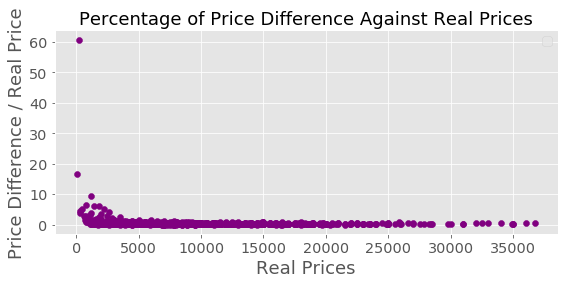

In [154]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


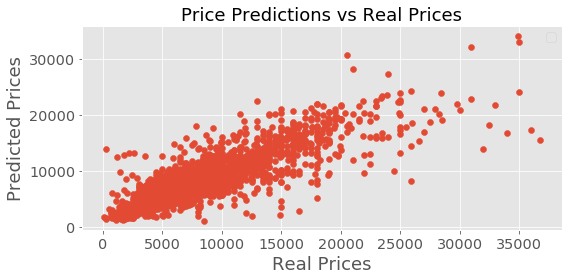

In [155]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

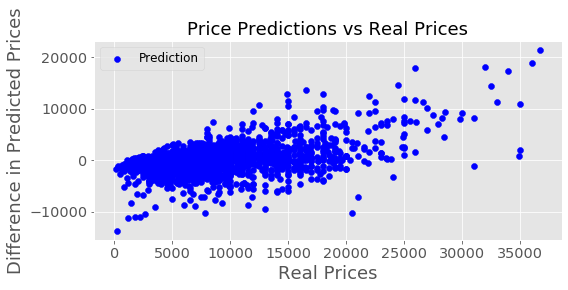

In [156]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

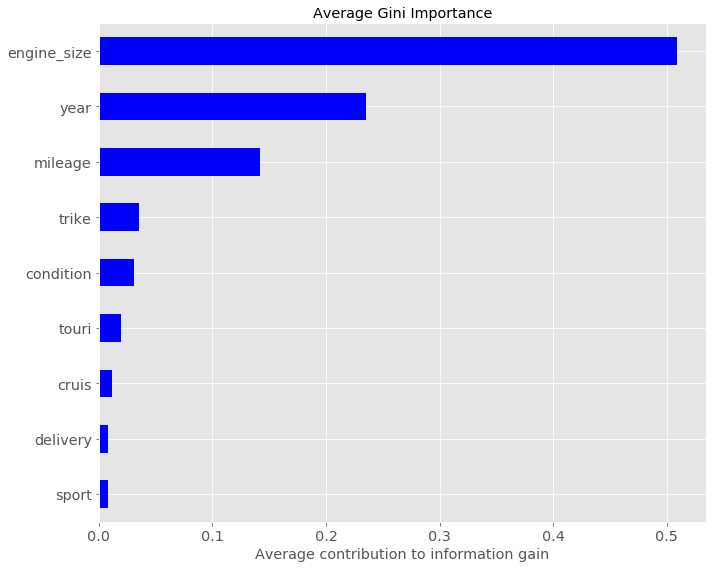

In [157]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [175]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [176]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [177]:
analysis_df['diff'] = diff

In [178]:
analysis_df['diff_percent'] = diff_percent

In [179]:
analysis_df['pos_or_neg'] = pos_or_neg

In [180]:
analysis_df['y_pred'] = y_pred

In [181]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 8224 to 16262
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2276 non-null   object 
 1   year            2276 non-null   float64
 2   price           2276 non-null   float64
 3   neighborhood    2147 non-null   object 
 4   description     2276 non-null   object 
 5   url             2276 non-null   object 
 6   model           2276 non-null   object 
 7   vin             2276 non-null   int64  
 8   condition       2276 non-null   int64  
 9   cryptocurrency  2276 non-null   int64  
 10  delivery        2276 non-null   int64  
 11  engine_size     2276 non-null   float64
 12  fuel_type       2276 non-null   object 
 13  mileage         2276 non-null   float64
 14  color           2276 non-null   object 
 15  street_legal    2276 non-null   int64  
 16  title_status    2276 non-null   object 
 17  transmission    2276 non-null

In [182]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [183]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 8224 to 16262
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2276 non-null   object 
 1   pos_or_neg      2276 non-null   object 
 2   diff            2276 non-null   float64
 3   diff_percent    2276 non-null   float64
 4   price           2276 non-null   float64
 5   y_pred          2276 non-null   float64
 6   year            2276 non-null   float64
 7   mileage         2276 non-null   float64
 8   engine_size     2276 non-null   float64
 9   condition       2276 non-null   int64  
 10  neighborhood    2147 non-null   object 
 11  description     2276 non-null   object 
 12  url             2276 non-null   object 
 13  model           2276 non-null   object 
 14  vin             2276 non-null   int64  
 15  cryptocurrency  2276 non-null   int64  
 16  delivery        2276 non-null   int64  
 17  fuel_type       2276 non-null

In [187]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [188]:
len(analysis_df)

2276

In [200]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,y_pred,year,mileage,engine_size,condition,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
12150,Honda Super Cub 2019,over +,3752.905000,1.072259,3500.0,7252.905000,2019.0,478.0,125.0,5,...,0,0,0,0,0,0,0,1,0,0
15923,2012 Triumph Thunderbird Cruiser Low Miles,over +,6386.135000,1.084233,5890.0,12276.135000,2012.0,2381.0,1597.0,3,...,0,0,0,0,0,0,0,1,0,0
2765,2006 Yamaha Road Star,over +,3915.640000,1.087678,3600.0,7515.640000,2006.0,21500.0,1700.0,4,...,0,0,0,0,0,0,0,1,0,0
10780,1998 Yamaha FZR600R,over +,1368.200000,1.094560,1250.0,2618.200000,1998.0,22280.0,600.0,3,...,0,0,0,0,0,0,0,1,0,0
14042,2017 Yamaha Bolt 950cc,over +,4550.785000,1.137696,4000.0,8550.785000,2017.0,1994.0,950.0,4,...,0,0,0,0,0,0,0,1,0,0
16747,Very original 1984 VF700C Magna,over +,4413.775000,1.161520,3800.0,8213.775000,1984.0,10859.0,70.0,4,...,0,1,0,0,0,0,0,1,0,0
4430,03 Yamaha Warrior,over +,7641.725000,1.175650,6500.0,14141.725000,2020.0,9724.0,1700.0,5,...,0,0,0,0,0,0,0,1,0,0
13483,2006 Honda VTX 1800C,over +,5294.610000,1.176580,4500.0,9794.610000,2006.0,12000.0,1800.0,4,...,0,0,0,0,0,0,0,1,0,0
15127,1982 Yamaha Maxim 1100cc,over +,1444.600000,1.203833,1200.0,2644.600000,1982.0,21000.0,1100.0,3,...,0,1,0,0,0,0,0,1,0,0
801,Restored Honda CT90,over +,2293.695000,1.207208,1900.0,4193.695000,1990.0,9601.0,90.0,4,...,0,0,0,0,0,0,0,1,0,0


In [207]:
df.drop([10359, 3644, 15600], inplace=True)

In [269]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [270]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [271]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.73032817984228
Out of Bag Score :  	 0.7041042732202862
Mean Squared Error Score :  2714.9415705011684


In [272]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(100*abs(diff_/_))

No handles with labels found to put in legend.


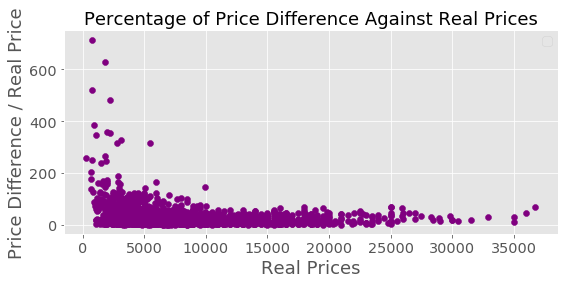

In [273]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


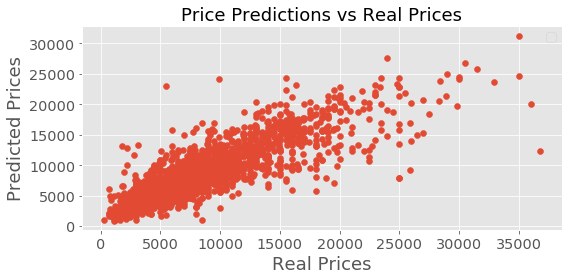

In [274]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


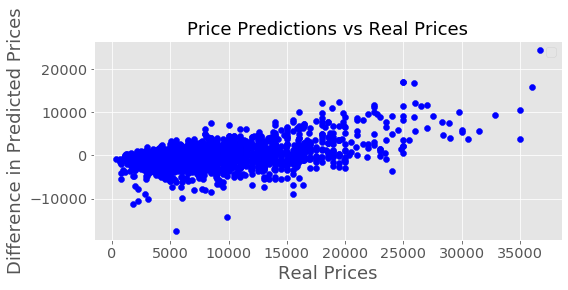

In [275]:
plt.scatter(y1_test, diff, color='b')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

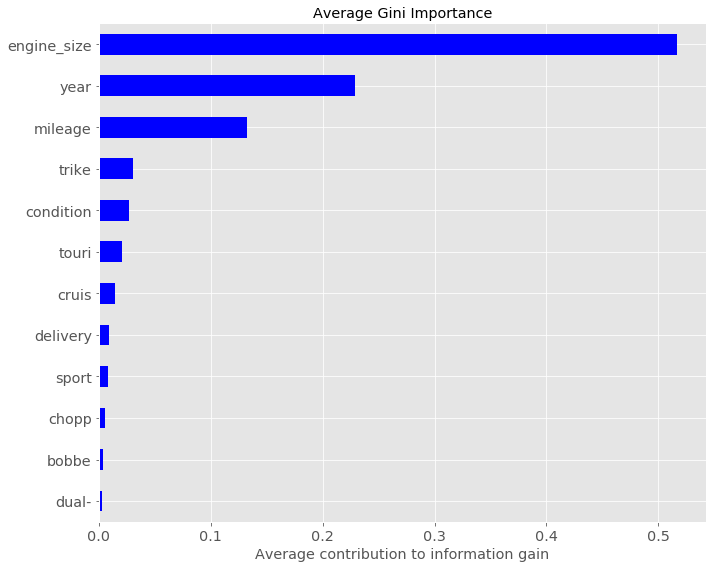

In [276]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [180]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [181]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [182]:
analysis_df['diff'] = diff

In [183]:
analysis_df['diff_percent'] = diff_percent

In [184]:
analysis_df['pos_or_neg'] = pos_or_neg

In [185]:
analysis_df['y_pred'] = y_pred

In [186]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 2657 to 1620
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2329 non-null   object 
 1   year          2329 non-null   float64
 2   price         2329 non-null   float64
 3   condition     2329 non-null   int64  
 4   delivery      2329 non-null   int64  
 5   engine_size   2329 non-null   float64
 6   mileage       2329 non-null   float64
 7   bobbe         2329 non-null   uint8  
 8   cafe          2329 non-null   uint8  
 9   chopp         2329 non-null   uint8  
 10  cruis         2329 non-null   uint8  
 11  dirtb         2329 non-null   uint8  
 12  dual-         2329 non-null   uint8  
 13  moped         2329 non-null   uint8  
 14  other         2329 non-null   uint8  
 15  scoot         2329 non-null   uint8  
 16  sport         2329 non-null   uint8  
 17  stand         2329 non-null   uint8  
 18  stree         2329 non-nu

In [187]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [188]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 2657 to 1620
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2329 non-null   object 
 1   pos_or_neg    2329 non-null   object 
 2   diff          2329 non-null   float64
 3   diff_percent  2329 non-null   float64
 4   price         2329 non-null   float64
 5   y_pred        2329 non-null   float64
 6   year          2329 non-null   float64
 7   mileage       2329 non-null   float64
 8   engine_size   2329 non-null   float64
 9   condition     2329 non-null   int64  
 10  delivery      2329 non-null   int64  
 11  bobbe         2329 non-null   uint8  
 12  cafe          2329 non-null   uint8  
 13  chopp         2329 non-null   uint8  
 14  cruis         2329 non-null   uint8  
 15  dirtb         2329 non-null   uint8  
 16  dual-         2329 non-null   uint8  
 17  moped         2329 non-null   uint8  
 18  other         2329 non-nu

In [189]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [190]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,y_pred,year,mileage,engine_size,condition,...,dirtb,dual-,moped,other,scoot,sport,stand,stree,touri,trike
2420,1997 Harley Dyna Glide low miles,over +,5431.375000,1.358183,3999.0,9430.375000,1997.0,14493.0,1340.0,4,...,0,0,0,0,0,0,0,0,0,0
144,2019 Yamaha YZF-R3 WE WANT YOUR TRADE !!! FRE...,over +,6788.470000,1.360960,4988.0,11776.470000,2019.0,2250.0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
5695,2006 Kawasaki Vulcan 2000cc,over +,7083.025000,1.388828,5100.0,12183.025000,2006.0,7049.0,2000.0,4,...,0,0,0,0,0,0,0,0,0,0
2756,2005 Suzuki Boulevard S40,over +,3753.255000,1.390094,2700.0,6453.255000,2005.0,5987.0,40.0,5,...,0,0,0,0,0,0,0,0,0,0
6909,03 zrx1200r,over +,5005.800000,1.390500,3600.0,8605.800000,2020.0,40000.0,1200.0,4,...,0,0,0,0,0,1,0,0,0,0
3699,1988 police Harley,over +,4133.725000,1.401263,2950.0,7083.725000,1988.0,6800.0,88.0,3,...,0,0,0,0,0,0,1,0,0,0
1422,2019 Amigo Boxer 150cc,over +,1754.195833,1.403357,1250.0,3004.195833,2019.0,170.0,150.0,5,...,0,0,0,0,1,0,0,0,0,0
2055,Scooters-Financing-Layaway-Full Service Shop-O...,over +,2577.457042,1.435909,1795.0,4372.457042,2020.0,0.0,150.0,6,...,0,0,0,0,1,0,0,0,0,0
1578,2002 KAWASAKI CLASSIC,over +,4363.140000,1.459244,2990.0,7353.140000,2002.0,3000.0,1500.0,5,...,0,0,0,0,0,0,0,0,0,0
624,2012 Electra Glide CVO,over +,11675.360000,1.459420,8000.0,19675.360000,2012.0,120774.0,110.0,3,...,0,0,0,0,0,0,0,0,0,0


In [397]:
X = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X1_test, y1_test))
print('MSE : ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

R Squared :  0.7444074711353437
MSE :  2643.0 2


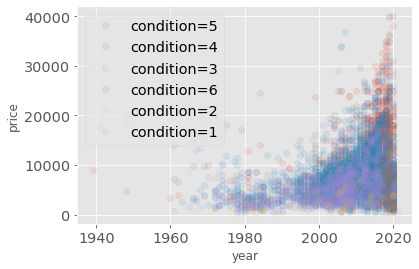

In [406]:
condition = df['condition'].unique()
for con in condition:
    plt.plot(df.loc[df.condition==con,'year'], 
             df.loc[df.condition==con,'price'], 
             linestyle='',
             marker='o',
             alpha=.1,
             label="condition="+str(con))
plt.xlabel('year')
plt.ylabel('price')
plt.legend(numpoints=1)

In [ ]:
num_vars = ['price', 'engine_size', 'mileage', 'co']